# Data Source

** 此系列的文件為Udemy的python金融分析課程系列筆記(https://www.udemy.com/python-for-finance-and-trading-algorithms) **

** 本單元利用之前所得到的技巧做簡單的金融股票分析 **


先利用import把需要的套件引入

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web
%matplotlib inline

利用pandas的datareader下載相關數據

本次分析汽車類股，因yahoo資訊源只有2016/9之後的數據，所以起始日期設定為2016/9/1

分析內容有裕隆、中華、裕日、和泰、三洋

其中資料較齊全的只有裕隆、中華、裕日，所以之後會以這三支股票分析其相關性

In [42]:
start = datetime.datetime(2016, 9, 1)
end = datetime.datetime(2017, 9, 1)
yulong = web.DataReader('2201.TW', 'yahoo', start, end)

In [43]:
yulong.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-31,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,27.299999,27.450001,27.200001,27.350000,26.837828,899000.0
2016-09-02,27.450001,27.500000,27.250000,27.299999,26.788763,740000.0
2016-09-05,27.350000,27.799999,27.350000,27.700001,27.181274,1147000.0
2016-09-06,27.799999,28.200001,27.650000,28.150000,27.622847,1834000.0


In [46]:
china = web.DataReader('2204.TW','yahoo',start,end)
sanyang = web.DataReader('2206.TW','yahoo',start,end)
toyota = web.DataReader('2207.TW','yahoo',start,end)
nissan = web.DataReader('2227.TW','yahoo',start,end)

列印所有股票的價位折線圖

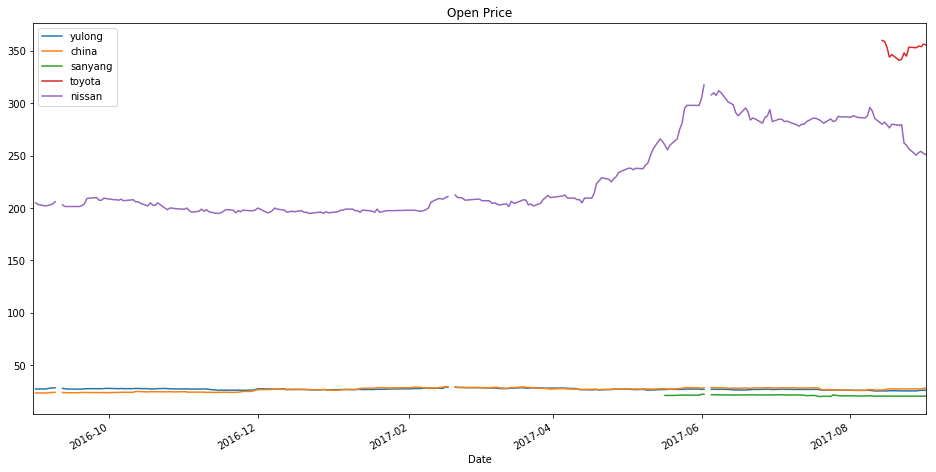

In [48]:
yulong['Open'].plot(label='yulong',figsize=(16,8),title='Open Price')
china['Open'].plot(label='china')
sanyang['Open'].plot(label='sanyang')
toyota['Open'].plot(label='toyota')
nissan['Open'].plot(label='nissan')
plt.legend()

列印交易量

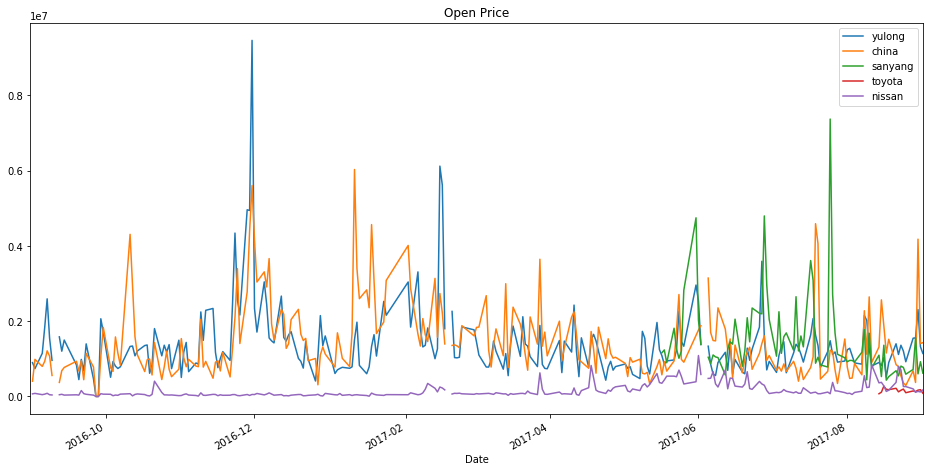

In [49]:
yulong['Volume'].plot(label='yulong',figsize=(16,8),title='Open Price')
china['Volume'].plot(label='china')
sanyang['Volume'].plot(label='sanyang')
toyota['Volume'].plot(label='toyota')
nissan['Volume'].plot(label='nissan')
plt.legend()

In [51]:
yulong['Volume'].argmax()

Timestamp('2016-11-30 00:00:00')

由價格乘以交易量，計算出實際交易額並列印

In [52]:
yulong['Total Traded'] = yulong['Open']*yulong['Volume']
china['Total Traded'] = china['Open']*china['Volume']
sanyang['Total Traded'] = sanyang['Open']*sanyang['Volume']
toyota['Total Traded'] = toyota['Open']*toyota['Volume']
nissan['Total Traded'] = nissan['Open']*nissan['Volume']

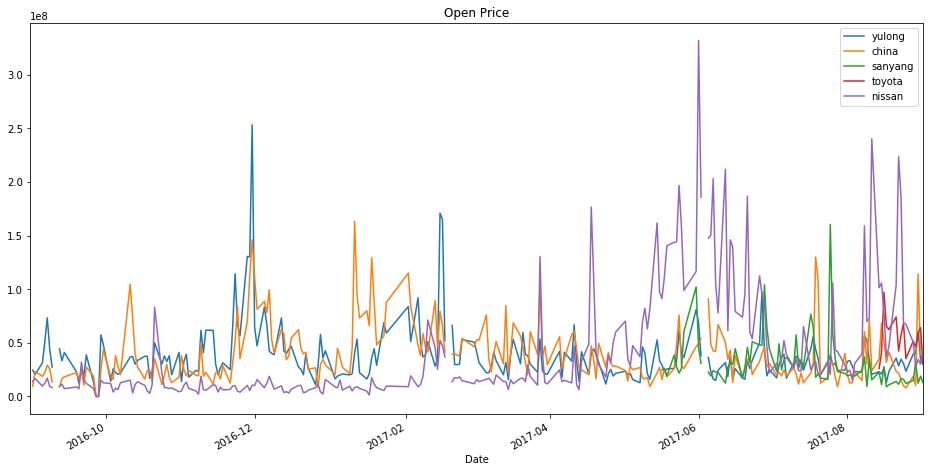

In [89]:
yulong['Total Traded'].plot(label='yulong',figsize=(16,8),title='Open Price')
china['Total Traded'].plot(label='china')
sanyang['Total Traded'].plot(label='sanyang')
toyota['Total Traded'].plot(label='toyota')
nissan['Total Traded'].plot(label='nissan')
plt.legend();

In [54]:
nissan['Total Traded'].argmax()

Timestamp('2017-06-01 00:00:00')

對裕日車這支股票做均線繪製，因有部分缺值，所以線有不連續

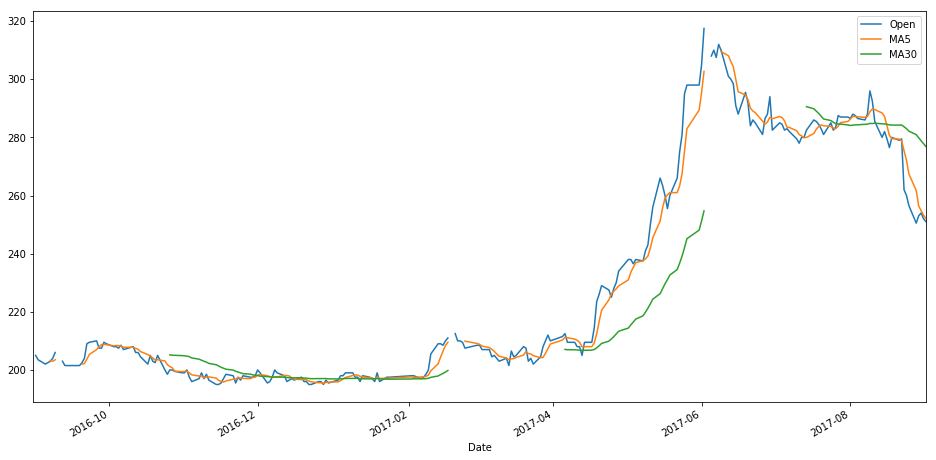

In [56]:
nissan['MA5'] = nissan['Open'].rolling(5).mean()
nissan['MA30'] = nissan['Open'].rolling(30).mean()
nissan[['Open','MA5','MA30']].plot(label='gm',figsize=(16,8))

對資料較齊全的股票：中華、裕隆、裕日做相關性分析，發現相關係數不高

In [58]:
from pandas.tools.plotting import scatter_matrix

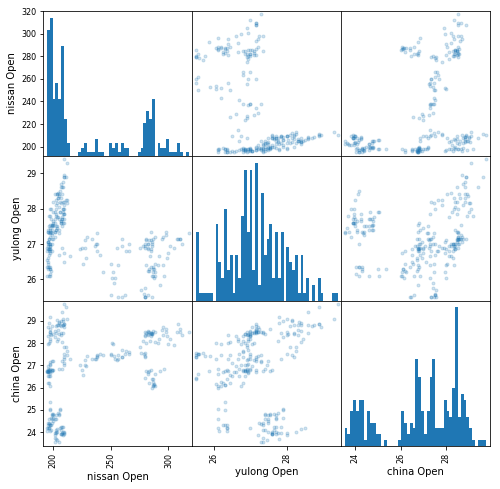

In [59]:
car_comp = pd.concat([nissan['Open'],yulong['Open'],china['Open']],axis=1)
car_comp.columns = ['nissan Open','yulong Open','china Open']
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

做傳統的蠟燭線繪製

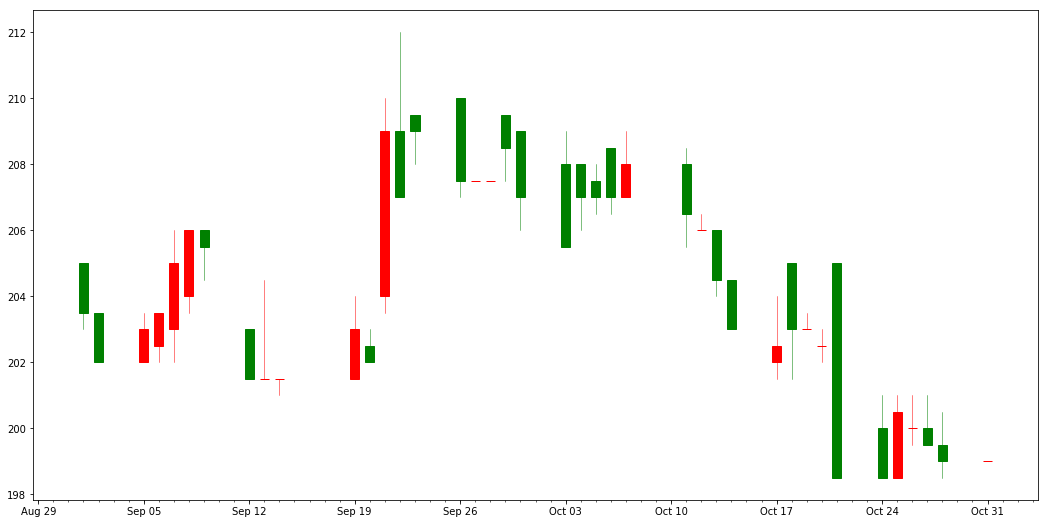

In [95]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
nissan_reset = nissan.loc['2016-09':'2016-10'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
nissan_reset['date_ax'] = nissan_reset['Date'].apply(lambda date: date2num(date))
nissan_values = [tuple(vals) for vals in nissan_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots(figsize=(18,10))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, nissan_values, width=0.6, colorup='r',colordown='g');

利用pct_change計算每日上漲的百分比

In [68]:
nissan['returns'] = nissan['Close'].pct_change(1)
nissan.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA5,MA30,returns
Date,,,,,,,,,,
2016-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,205.0,205.0,203.0,203.5,187.680206,69000.0,14145000.0,NaN,NaN,NaN
2016-09-02,203.5,203.5,202.0,202.0,186.296814,82000.0,16687000.0,NaN,NaN,-0.007371
2016-09-05,202.0,203.5,202.0,203.0,187.219086,48000.0,9696000.0,NaN,NaN,0.004950
2016-09-06,202.5,203.5,202.0,203.5,187.680206,61000.0,12352500.0,NaN,NaN,0.002463


In [70]:
yulong['returns'] = yulong['Close'].pct_change(1)
china['returns'] = china['Close'].pct_change(1)

In [71]:
yulong.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns
Date,,,,,,,,
2016-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,27.299999,27.450001,27.200001,27.350000,26.837828,899000.0,2.454270e+07,NaN
2016-09-02,27.450001,27.500000,27.250000,27.299999,26.788763,740000.0,2.031300e+07,-0.001828
2016-09-05,27.350000,27.799999,27.350000,27.700001,27.181274,1147000.0,3.137045e+07,0.014652
2016-09-06,27.799999,28.200001,27.650000,28.150000,27.622847,1834000.0,5.098520e+07,0.016245


In [72]:
china.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns
Date,,,,,,,,
2016-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,23.549999,23.700001,23.549999,23.700001,22.357700,405000.0,9.537750e+06,NaN
2016-09-02,23.650000,23.650000,23.400000,23.549999,22.216194,986000.0,2.331890e+07,-0.006329
2016-09-05,23.549999,23.750000,23.450001,23.600000,22.263363,799000.0,1.881645e+07,0.002123
2016-09-06,23.700001,23.950001,23.650000,23.950001,22.593540,934000.0,2.213580e+07,0.014831


繪製漲跌百分比的分佈圖

可以看得出來裕日車價格的變化性較大

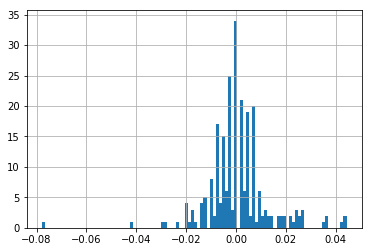

In [74]:
nissan['returns'].hist(bins=100);

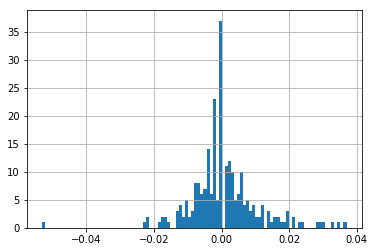

In [75]:
china['returns'].hist(bins=100);

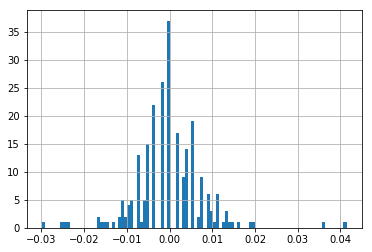

In [76]:
yulong['returns'].hist(bins=100);

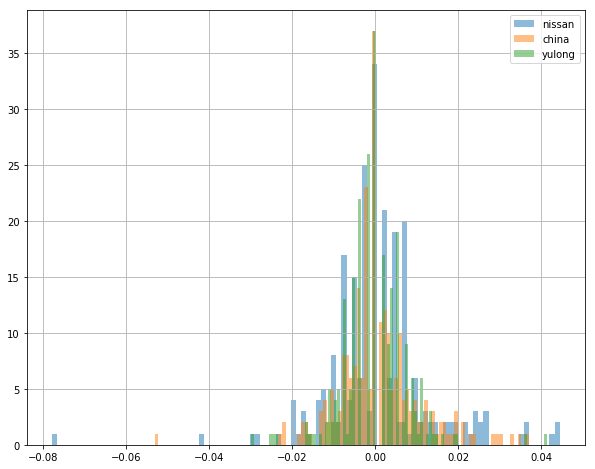

In [77]:
nissan['returns'].hist(bins=100,label='nissan',figsize=(10,8),alpha=0.5)
china['returns'].hist(bins=100,label='china',alpha=0.5)
yulong['returns'].hist(bins=100,label='yulong',alpha=0.5)
plt.legend()

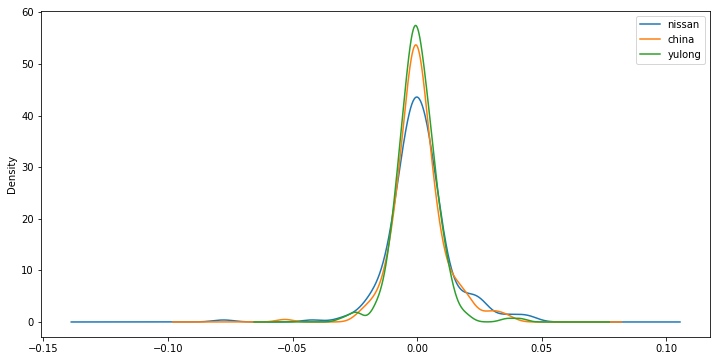

In [78]:
nissan['returns'].plot(kind='kde',label='nissan',figsize=(12,6))
china['returns'].plot(kind='kde',label='china')
yulong['returns'].plot(kind='kde',label='yulong')
plt.legend()

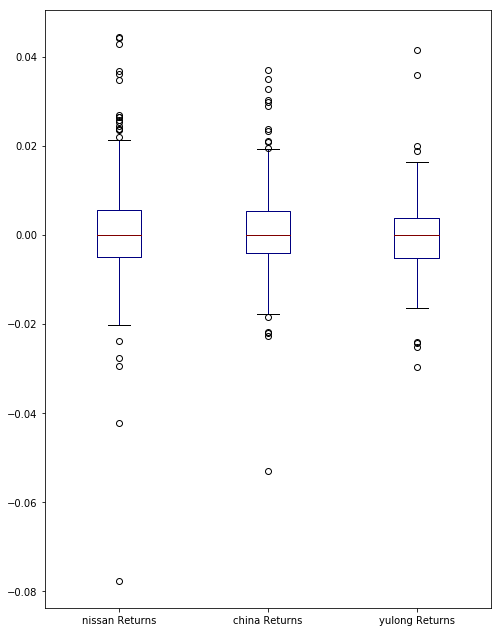

In [81]:
box_df = pd.concat([nissan['returns'],china['returns'],yulong['returns']],axis=1)
box_df.columns = ['nissan Returns','china Returns','yulong Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

由三隻股票的價格變化做相關性分析，並無發現任何趨勢

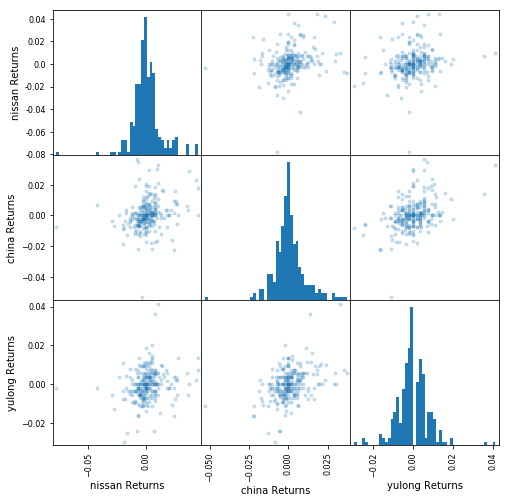

In [82]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

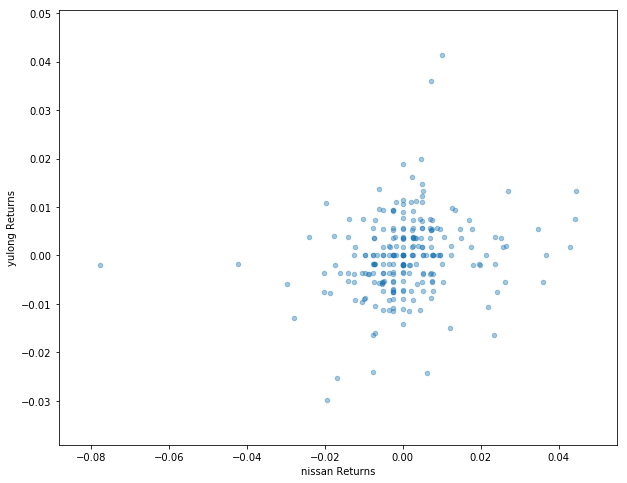

In [84]:
box_df.plot(kind='scatter',x='nissan Returns',y='yulong Returns',alpha=0.4,figsize=(10,8))

計算假如從2016/09/01買進這三隻股票，到2017/09/01投資報酬為多少

In [96]:
nissan['Cumulative Return'] = (1 + nissan['returns']).cumprod()
nissan.tail()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA5,MA30,returns,Cumulative Return
Date,,,,,,,,,,,
2017-08-28,250.5,251.0,248.0,250.5,250.5,201534.0,50484267.0,261.7,280.950000,-0.005952,1.230958
2017-08-29,253.0,254.0,250.5,252.0,252.0,110287.0,27902611.0,256.4,279.866667,0.005988,1.238329
2017-08-30,254.0,255.0,250.0,250.5,250.5,135458.0,34406332.0,254.8,278.850000,-0.005952,1.230958
2017-08-31,252.0,252.0,248.5,249.0,249.0,120050.0,30252600.0,253.2,277.816667,-0.005988,1.223587
2017-09-01,251.0,253.0,249.0,250.0,250.0,174437.0,43783687.0,252.1,276.816667,0.004016,1.228501


In [87]:
china['Cumulative Return'] = (1 + china['returns']).cumprod()
yulong['Cumulative Return'] = (1 + yulong['returns']).cumprod()

In [102]:
print('裕日車',nissan['Cumulative Return'].tail(1))
print('裕隆',yulong['Cumulative Return'].tail(1))
print('中華',china['Cumulative Return'].tail(1))

裕日車 Date
2017-09-01    1.228501
Name: Cumulative Return, dtype: float64
裕隆 Date
2017-09-01    0.952468
Name: Cumulative Return, dtype: float64
中華 Date
2017-09-01    1.164557
Name: Cumulative Return, dtype: float64


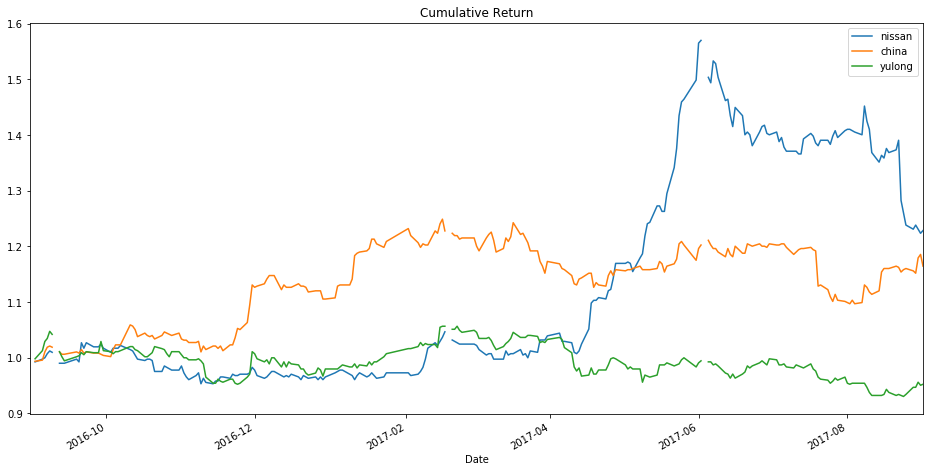

In [88]:
nissan['Cumulative Return'].plot(label='nissan',figsize=(16,8),title='Cumulative Return')
china['Cumulative Return'].plot(label='china')
yulong['Cumulative Return'].plot(label='yulong')
plt.legend()